In [18]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import OLSInfluence
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

In [79]:
df = pd.read_csv('datasets/auto-mpg.csv',na_values='?')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [80]:
#creating a model with horsepower as the predictor and mpg as the response
X = sm.add_constant(df.horsepower)
y = df.mpg
# df['horsepower']=df['horsepower'].astype(float)
# df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
model = sm.OLS(y,X)
estimate = model.fit()
print(estimate.summary())
df.shape

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        11:56:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

(392, 9)

In [76]:
# equation is y=39.9359 + (-0.1578)*x
# x=98, y=24.4715


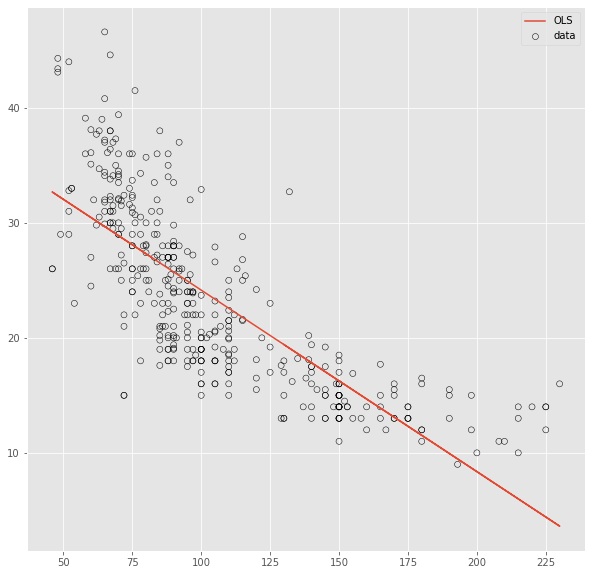

In [81]:
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(df['horsepower'],estimate.fittedvalues,label='OLS')
ax.scatter(df['horsepower'],y,facecolors='none',edgecolors='black',label='data')
ax.legend()

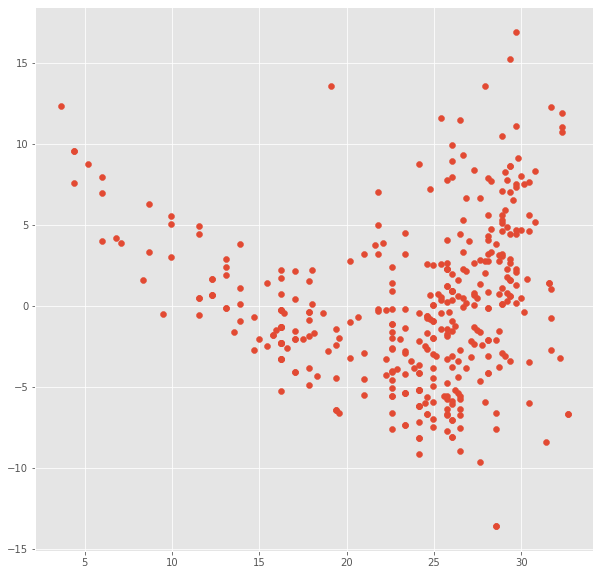

In [82]:
fig,ax_diag=plt.subplots(figsize=(10,10))
ax_diag.scatter(estimate.fittedvalues,estimate.resid.values)